<div class="alert alert-info"><b>Описание проекта:</b>
   
<b>"Определение рыночной стоимости объектов недвижимости"</b>

***

**Цели проекта:**
- используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.
    
***
    
**Задачи исследования:**  
- на основании имеющихся данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, определить рыночную стоимость объектов недвижимости и типичные параметры квартир;
- проверить следующие гипотезы:
    * стоимость недвижимости зависит от общей площади;
    * стоимость недвижимости зависит от жилой площади;
    * стоимость недвижимости зависит от площади кухни;
    * стоимость недвижимости зависит от количества комнат;
    * стоимость недвижимости зависит от типа этажа, на котором расположена квартира (первый, последний, другой);
    * стоимость недвижимости зависит от даты размещения (день недели, месяц, год).
        
***
<b>Описание данных:</b>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

In [2]:
# открываем файл с датасетом, выводим первые 5 строк

try:
    data = pd.read_csv('C:/Датасеты и проекты/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# получаем информацию о датасете.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


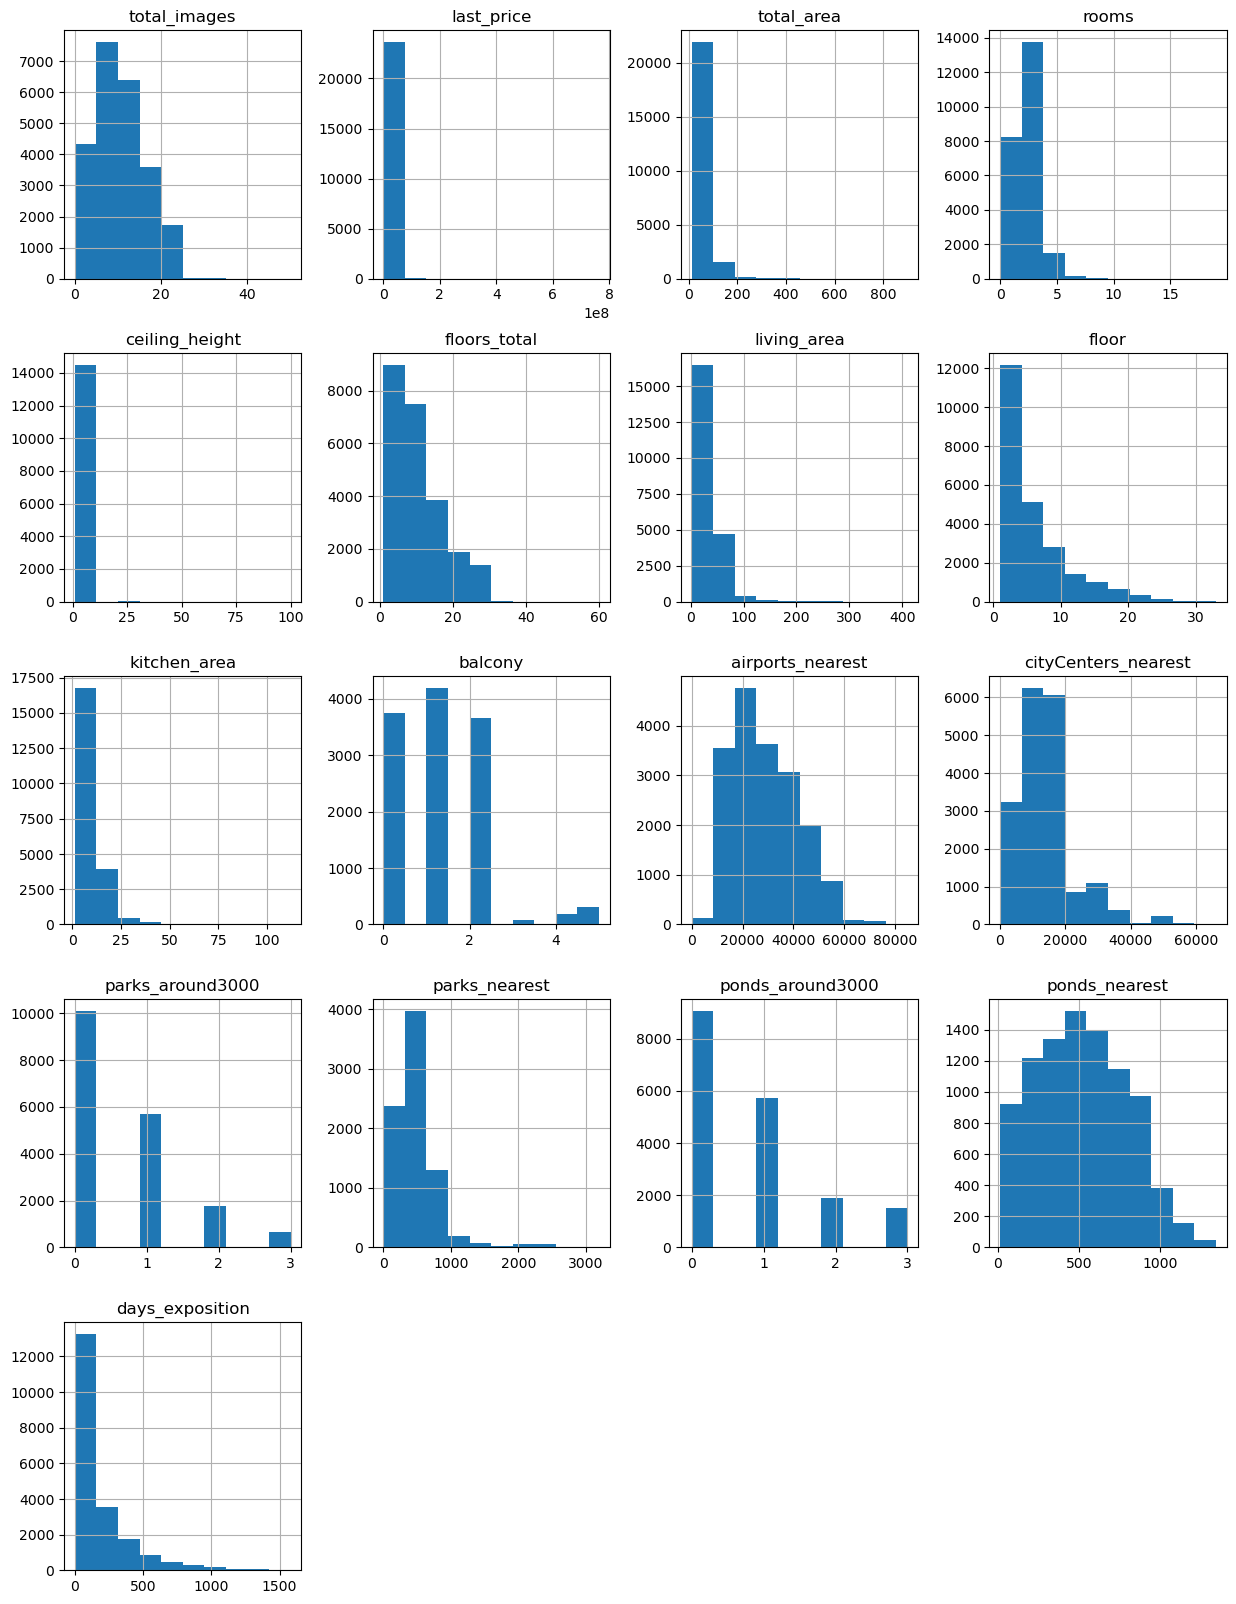

In [5]:
# Построена общая гистограмма для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20));

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><font size=3px face="Arial"><b>Выводы по результатам изучения датасета:</b></font>

    
В датасете прослеживаются <font color="292929" face="Arial"><b> пропуски в столбцах </b></font> 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

    
Необходимо  <font color="292929" face="Arial"><b>изменить тип данных</b></font> в столбцах 'first_day_exposition', 'floors_total', 'is_apartment', 'balcony', 'locality_name', 'parks_around3000', 'ponds_around3000', 'days_exposition'.  


Прослеживаются <font color="292929" face="Arial"><b>аномальные значения</b></font> в столбцах 'last_price', 'total_area', 'rooms', 'ceiling_height', 'living_area', 'floor','kitchen_area'.
    
    
В колонке 'locality_name' среди названий населенных пунктов выявлены <font color="292929" face="Arial"><b>неявные дубликаты</b></font>.
</div>

### Предобработка данных

In [6]:
# Проверяем названия столбцов.
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# Выводим количество пропущенных значений для каждого столбца.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Замена пропущенных значений в столбце 'ceiling_height' на медианные значения по столбцу, не превышающие 4 м.
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data.loc[data['ceiling_height'] < 4, 'ceiling_height'].median()
# data.head()

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>


* <font color="292929" face="Arial"><b>ceiling_height</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости. Учитывая, что строительными ГОСТами установлена высота потолка от 2,4 до 4 метров, допустимо заменить пропуски медианным значением на основе заполненных данных.
</div>

In [9]:
# Замена пропущенных значений в столбце 'floors_total' на значения столбца 'floor' с увеличением на 1
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor'] + 1.0

# Приведение данных в столбце 'floors_total' к типу int.
data['floors_total'] = data['floors_total'].astype(int)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>floors_total</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости. Учитывая, что количество пропусков в данном столбце составляет лишь 0,36 % от общего количества объектов недвижимости, допустимо заменить пропуски значением этажа, на котором расположен объект недвижимости с увеличением на единицу, поскольку одноэтажных многоквартирных домов практически не существует.
</div>

In [10]:
# Создаем переменную 'living_area_percent', в которую добавляем результат отношения жилой площади к общей 
# площади по тем объектам недвижимости, где обе величины указаны.
living_area_percent = data.loc[~data['living_area'].isna(), 'living_area'] / data.loc[~data['living_area'].isna(), 'total_area']

# Замена пропущенных значений в столбце 'living_area' на произведение общей площади 
# и медианного значения переменной 'living_area_percent', с округлением до двух знаков после запятой.
data.loc[data['living_area'].isna(), 'living_area'] = (data.loc[data['living_area'].isna(), 'total_area'] * living_area_percent.median()).round(2)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>living_area</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости. Создаем переменную 'living_area_percent', в которую добавляем результат отношения жилой площади к общей площади по тем объектам недвижимости, где обе величины указаны.
Целесообразно заменить пропущенные значения в столбце 'living_area' на произведение общей площади строк с пропусками и медианного значения переменной 'living_area_percent', с округлением до двух знаков после запятой.    
</div>

In [11]:
# Замена пропущенных значений в столбце 'is_apartment' на False.
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>is_apartment</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости про причине того, что объект недвижимости не относится к типу "аппартаменты". В этом случае допустимо заменить пропуски значениями "False".
</div>

In [12]:
# Создаем переменную 'kitchen_area_percent', в которую добавляем результат отношения площади кухни к общей 
# площади по тем объектам недвижимости, где обе величины указаны.
kitchen_area_percent = data.loc[~data['kitchen_area'].isna(), 'kitchen_area'] / data.loc[~data['kitchen_area'].isna(), 'total_area']

In [13]:
# Замена пропущенных значений в столбце 'kitchen_area' на произведение общей площади 
# и медианного значения переменной 'kitchen_area_percent', с округлением до двух знаков после запятой.
data.loc[(data['kitchen_area'].isna()) & (data['studio'] != True) & (data['open_plan'] != True), 'kitchen_area'] = \
(data.loc[data['kitchen_area'].isna(), 'total_area'] * kitchen_area_percent.median()).round(2)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>kitchen_area</b></font> - у студий и у объектов недвижимости со свободной планировкой кухня как таковая отсутствует, поэтому допустимо пропущенные значения оставить как есть. Оставшиеся пропущенные значения заменяем на произведение общей площади и медианного значения переменной 'kitchen_area_percent', с округлением до двух знаков после запятой. 
</div>

In [14]:
# Замена пропущенных значений в столбце 'balcony' на 0, приведение данных к типу int.
data['balcony'] = data['balcony'].fillna(0).astype(int)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>balcony</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости по причине отсутствия балкона. В этом случае допустимо заменить пропуски нулевыми значениями.
</div>

In [15]:
# Изучаю количество квартир по населенным пунктам.
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу v1:</b></font>

* <font color="292929" face="Arial"><b>locality_name</b></font> - причиной пропусков в данном столбце вероятно послужил факт того, что пользователи не заполнили эту графу при размещении объекта недвижимости. В целях недопущения искажения данных оставляем пропуски как есть.
</div>

In [16]:
# Перевод значений в столбце 'first_day_exposition' в более удобные объекты datetime.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
# Замена в студиях и объектах недвижимости со свободной планировкой количества комнат с 0 на 1.
data.loc[((data['studio'] == True) | (data['open_plan'] == True)) & (data['rooms'] == 0), 'rooms'] = 1

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>rooms</b></font> в студиях и объектах недвижимости со свободной планировкой - поскольку не существует объектов недвижимости совсем без комнат, нулевые значения были заменены на 1.
</div>

In [18]:
# Поиск явных дубликатов.
data.duplicated().sum()
# Явных дубликатов не обнаружено.

0

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px color="#1E90FF" face="Arial"><b>Для работы с пропусками в картографических данных необходимо устранить неявные дубликаты в столбце 'locality_name'</b></font>


</div>

In [19]:
# Создаем множество уникальных названий населенных пунктов, состоящее только из имен собственных (с учетом пропущенных значений):
cities = list(data.loc[~data['locality_name'].isna(), 'locality_name'].unique())

name_cities = []

for city in cities:
    name = city.split()
    name_with_up = []
    for i in range(len(name)):        
        if name[i] == name[i].lower():
            continue
        else:
            name_with_up.append(name[i])     
    
    name_cities.append(" ".join(name_with_up))

unique_name_cities = set(name_cities)

In [20]:
# Функция по замене названий населенных пунктов на имена собственные.
def categorize_purpose(row):
    for i in unique_name_cities:   
        if str(i) in row:
            return i   

In [21]:
# Вызов функции по замене названий населенных пунктов на имена собственные (с учетом пропущенных значений).
data.loc[~data['locality_name'].isna(), 'locality_name'] = data.loc[~data['locality_name'].isna(), 'locality_name'].apply(categorize_purpose)

In [22]:
# Повторный поиск явных дубликатов.
data.duplicated().sum()

0

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к пропускам в данных по столбцу:</b></font>

* <font color="292929" face="Arial"><b>days_exposition</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что объект недвижимости на дату формирования датасета еще не снят с продажи. Оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>parks_nearest</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных. В целях исключения искажения данных оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>parks_around3000</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных. В целях исключения искажения данных оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>ponds_nearest</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных. В целях исключения искажения данных оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>ponds_around3000</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных. В целях исключения искажения данных оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>airports_nearest</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных.  В целях исключения искажения данных оставляем пропуски как есть.
* <font color="292929" face="Arial"><b>cityCenters_nearest</b></font> - можно предположить, что причиной пропусков в данном столбце явилось то, что исходная таблица была некорректно объединена с другим датасетом, содержавшим сведения о картографических данных.  В целях исключения искажения данных оставляем пропуски как есть.
</div>

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Комментарий к изменениям типов данных по столбцам:</b></font>

* <font color="292929" face="Arial"><b>balcony</b></font> - количество балконов является целым числом.
* <font color="292929" face="Arial"><b>floors_total</b></font> - количество этажей в доме является целым числом.
* <font color="292929" face="Arial"><b>first_day_exposition</b></font> - в данном столбце имеются нулевые значения времени, которые не информативны. Значения столбца переведены в более удобные для работы объекты datetime.
</div>

In [23]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23483.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.078948,2.724358,10.675092,34.578225,5.892358,10.539333,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.066196,0.988298,6.595719,22.340666,4.885249,6.019614,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [24]:
# Замена аномальных значений (до 5 м²) в столбце 'kitchen_area' на произведение общей площади 
# и медианного значения переменной 'kitchen_area_percent', с округлением до двух знаков после запятой.
data.loc[(data['kitchen_area'] < 5), 'kitchen_area'] = (data['total_area'] * kitchen_area_percent.median()).round(2)

In [25]:
# Значения, превышающие 24, делим на 10
data.loc[data['ceiling_height'] > 24, 'ceiling_height'] = data['ceiling_height'] / 10

In [26]:
# Создаем новый датасет, в котором сохраняем объекты недвижимости после фильтрации аномальных значений.
data_new = data.query('last_price <= 40000000 \
                      and total_area < 200 \
                      and rooms < 12 \
                      and 2 < ceiling_height <= 5 \
                      and 5 <= kitchen_area < 50')

In [27]:
# Количество отсеянных по результатам фильтрации данных.
1 - data_new.shape[0] / data.shape[0]
# Результат составил примерно 3.4 %, что приемлемо.

0.03371450272163379

In [28]:
data = data_new

### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
# Столбец с ценой одного квадратного метра
data['price_per_meter'] = (data['last_price'] / data['total_area']).astype(int)

In [30]:
# Столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
data['week_day'] = data['first_day_exposition'].dt.weekday

In [31]:
# Столбец с месяцем публикации объявления.
data['month'] = data['first_day_exposition'].dt.month

In [32]:
# Столбец с годом публикации объявления.
data['year'] = data['first_day_exposition'].dt.year

In [33]:
# Столбец с типом этажа квартиры
def categorize_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [34]:
data['type_floor'] = data.apply(lambda x: categorize_floor(x['floor'], x['floors_total']), axis=1)

In [35]:
# Расстояние до центра города в километрах, округление до целого числа.
data['distance'] = (round(data.loc[~data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] / 1000))

### Проведите исследовательский анализ данных

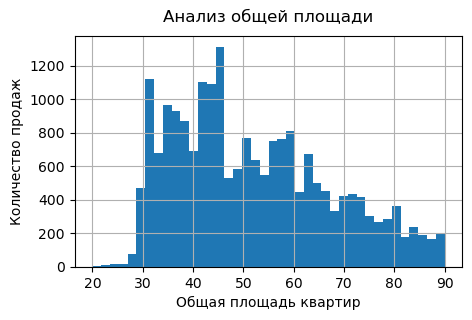

In [36]:
# Построение гистограммы по значения колонки 'total_area'
data['total_area'].hist(bins=40, range = (20, 90), figsize=(5, 3));
plt.title('Анализ общей площади', loc='center', pad = 10)
plt.xlabel('Общая площадь квартир')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'total_area':</b></font>

Из гистограммы прослеживается, что основная часть квартир имеют общую площадь от 30 до 60 кв.м.

</div>

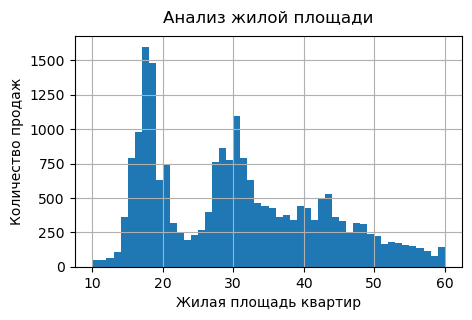

In [37]:
# Построение гистограммы по значения колонки 'living_area'
data['living_area'].hist(bins=50, range = (10, 60), figsize=(5, 3));
plt.title('Анализ жилой площади', loc='center', pad = 10)
plt.xlabel('Жилая площадь квартир')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'living_area':</b></font>

Значения идут в корреляции со значениями общей площади квартир, гистограмма имеет 2 выделяющиеся вершины, больше всего значений жилой площади от 15 до 22 кв.м. и от 27 до 36 кв.м.

</div>

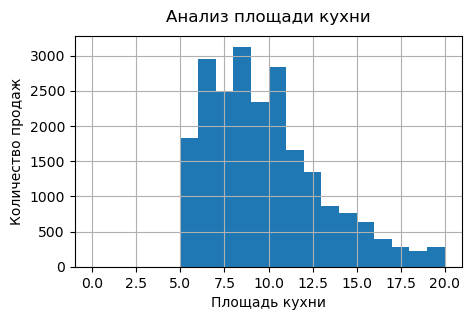

In [38]:
# Построение гистограммы по значениям колонки 'kitchen_area'
data['kitchen_area'].hist(bins=20, range = (0, 20), figsize=(5, 3));
plt.title('Анализ площади кухни', loc='center', pad = 10)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'kitchen_area':</b></font>

В датасете преобладают кухни со значениями площади от 5 до 15 кв.м.

</div>

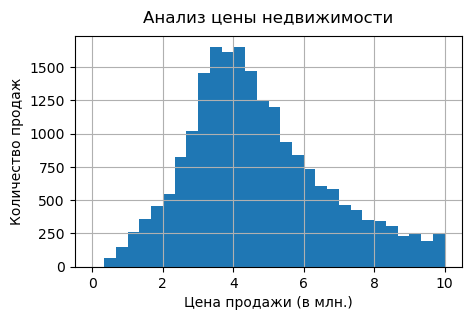

In [39]:
# Построение гистограммы по значениям колонки 'last_price'
data['last_price_new'] = data['last_price'] / 1000000
data['last_price_new'].hist(bins=30, range = (0, 10), figsize=(5, 3));
plt.title('Анализ цены недвижимости', loc='center', pad = 10)
plt.xlabel('Цена продажи (в млн.)')
plt.ylabel('Количество продаж')
plt.grid(True)

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'last_price':</b></font>

Гистограмма имеет нормальное распределение. В датасете преобладают квартиры со стоимостью от 2 до 6.5 млн.

</div>

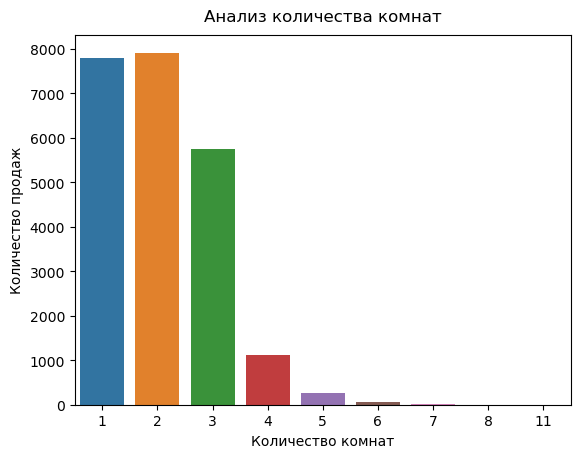

In [40]:
# Построение гистограммы по значениям колонки 'rooms'

sns.countplot(x = data['rooms'])
plt.title('Анализ количества комнат', loc='center', pad = 10)
plt.xlabel('Количество комнат')
plt.ylabel('Количество продаж');

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'rooms':</b></font>

В датасете преобладают квартиры с количеством комнат от 1 до 3.

</div>

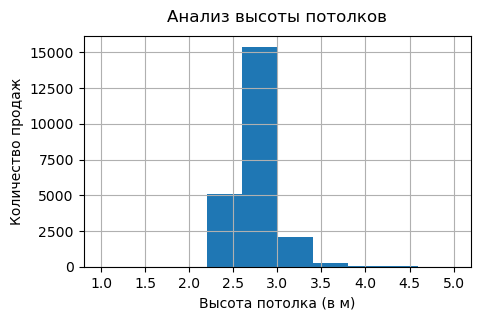

In [41]:
# Построение гистограммы по значениям колонки 'ceiling_height'
data['ceiling_height'].hist(bins=10, range = (1, 5), figsize=(5, 3));
plt.title('Анализ высоты потолков', loc='center', pad = 10)
plt.xlabel('Высота потолка (в м)')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'ceiling_height':</b></font>

В датасете преобладают квартиры с высотой потолков от 2.4 до 3 м.

</div>

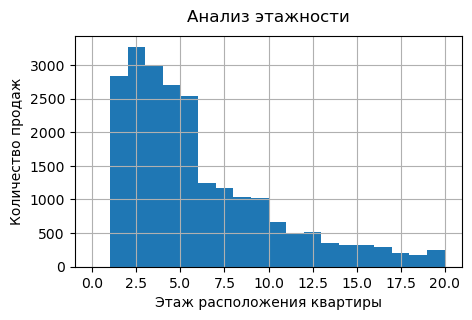

In [42]:
# Построение гистограммы по значениям колонки 'floor'
data['floor'].hist(bins=20, range = (0, 20), figsize=(5, 3));
plt.title('Анализ этажности', loc='center', pad = 10)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'floor':</b></font>

В датасете преобладают квартиры, расположенные на этажах с 1 по 6.

</div>

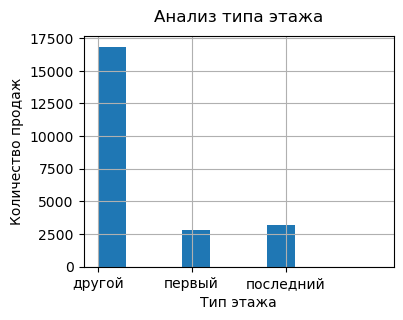

In [43]:
# Построение гистограммы по значениям колонки 'type_floor'
data['type_floor'].hist(bins=10, range = (0, 3), figsize=(4, 3));
plt.title('Анализ типа этажа', loc='center', pad = 10)
plt.xlabel('Тип этажа')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'type_floor':</b></font>

В датасете преобладают квартиры, расположенные на этажах между первым и последним.

</div>

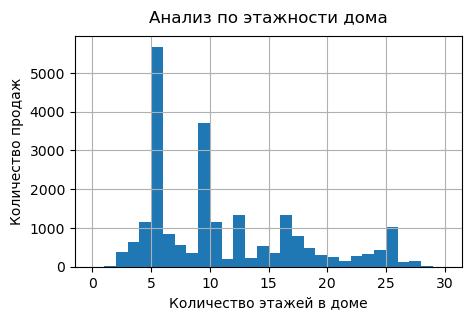

In [44]:
# Построение гистограммы по значениям колонки 'floors_total'
data['floors_total'].hist(bins=30, range = (0, 30), figsize=(5, 3));
plt.title('Анализ по этажности дома', loc='center', pad = 10)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'floors_total':</b></font>

В датасете преобладают квартиры, расположенные в 5-и 9-иэтажных домах.

</div>

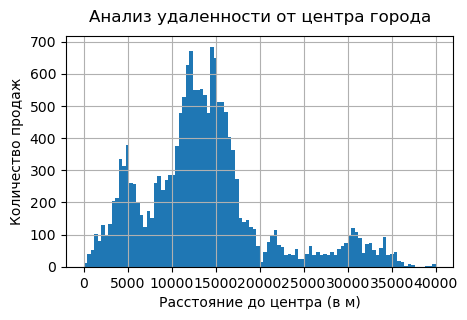

In [45]:
# Построение гистограммы по значениям колонки 'cityCenters_nearest'
data['cityCenters_nearest'].hist(bins=100, range = (0, 40000), figsize=(5, 3));
plt.title('Анализ удаленности от центра города', loc='center', pad = 10)
plt.xlabel('Расстояние до центра (в м)')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'cityCenters_nearest':</b></font>

В датасете преобладают квартиры, расположенные на удалении от 3000 до 7000 м и от 10000 до 17000 м до центра города.

</div>

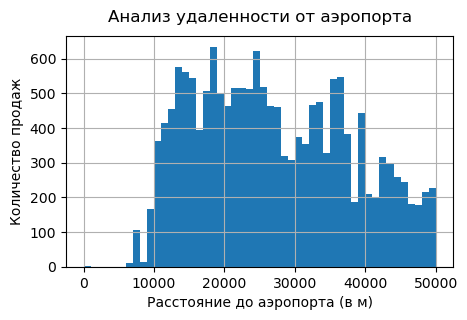

In [46]:
# Построение гистограммы по значениям колонки 'airports_nearest'
data['airports_nearest'].hist(bins=50, range = (0, 50000), figsize=(5, 3));
plt.title('Анализ удаленности от аэропорта', loc='center', pad = 10)
plt.xlabel('Расстояние до аэропорта (в м)')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'airports_nearest':</b></font>

В датасете преобладают квартиры, расположенные на удалении от 10000 до 28000 м до аэропорта.

</div>

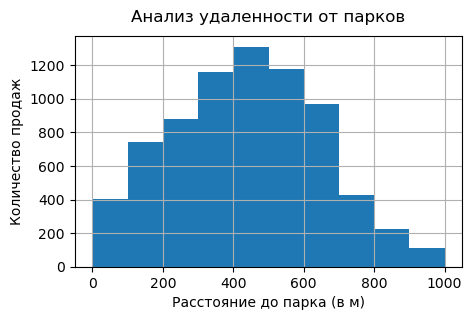

In [47]:
# Построение гистограммы по значениям колонки 'parks_nearest'
data['parks_nearest'].hist(bins=10, range = (0, 1000), figsize=(5, 3));
plt.title('Анализ удаленности от парков', loc='center', pad = 10)
plt.xlabel('Расстояние до парка (в м)')
plt.ylabel('Количество продаж')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'parks_nearest':</b></font>

Среди заполненных значений в датасете преобладают квартиры, расположенные на удалении от 100 до 750 м до парков.

</div>

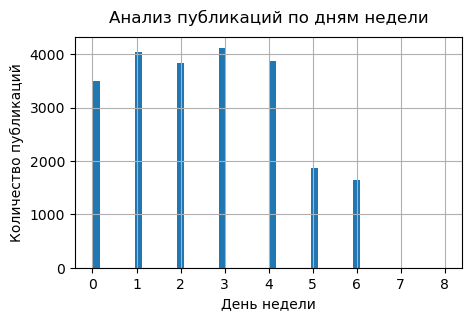

In [48]:
# Построение гистограммы по значениям колонки 'week_day'
data['week_day'].hist(bins=50, range = (0, 8), figsize=(5, 3));
plt.title('Анализ публикаций по дням недели', loc='center', pad = 10)
plt.xlabel('День недели')
plt.ylabel('Количество публикаций')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдения по столбцу 'week_day':</b></font>

В основном объявления публиковались в будние дни.

</div>

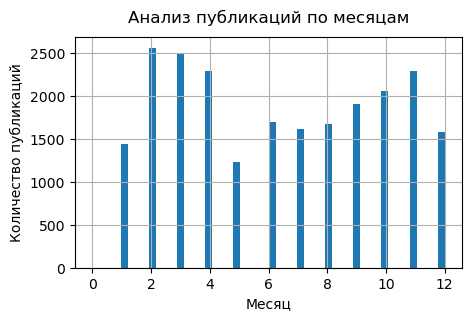

In [49]:
# Построение гистограммы по значениям колонки 'month'
data['month'].hist(bins=50, range = (0, 12), figsize=(5, 3));
plt.title('Анализ публикаций по месяцам', loc='center', pad = 10)
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'month':</b></font>

В основном объявления публиковались с февраля по апрель и с сентября по ноябрь.

</div>

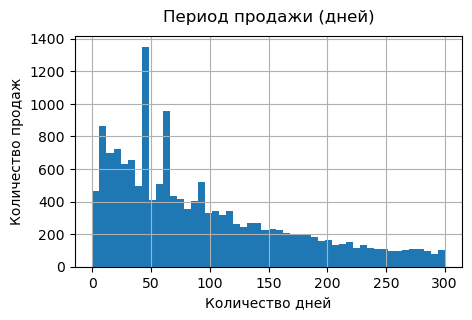

In [50]:
# Построение гистограммы по значениям колонки 'days_exposition'
data['days_exposition'].hist(bins=50, range = (0, 300), figsize=(5, 3));
plt.title('Период продажи (дней)', loc='center', pad = 10)
plt.xlabel('Количество дней')
plt.ylabel('Количество продаж')
plt.grid(True)

In [51]:
# Среднее по столбцу 'days_exposition' за вычетом отрицательных значений.
data['days_exposition'].mean()

180.57840863251312

In [52]:
# Медиана по столбцу 'days_exposition'.
data['days_exposition'].median()

96.0

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдения по столбцу 'days_exposition':</b></font>

Обычно квартиры продаются в срок до трех месяцев. Продолжительность продажи свыше 8 месяцев можно считать необычно долгими.

</div>

In [53]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'week_day',
       'month', 'year', 'type_floor', 'distance', 'last_price_new'],
      dtype='object')

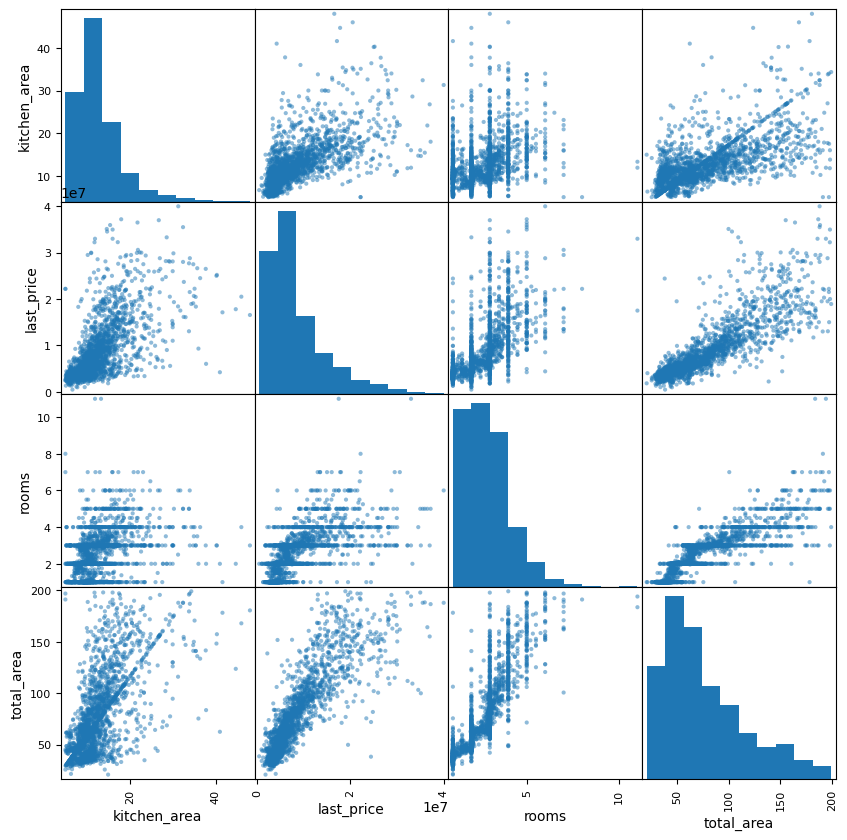

In [54]:
# Изучение зависимости с применением диаграмм рассеяния
data_multi = data.pivot_table(index='living_area', values=['last_price', 'total_area', 'kitchen_area','rooms'])
pd.plotting.scatter_matrix(data_multi, figsize=(10,10));

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Промежуточный вывод по результатам исследования диаграмм рассеяния:</b></font>

    
<font color="292929" face="Arial"><b>1. Влияние на стоимость недвижимости общей площади.</b></font>

Цена продажи недвижимости находится в прямой зависимости от общей площади. Особенно сильно эта зависимость прослеживается у недвижимости с общей площадью до 100 м². На стоимость квартир с большей площадью дополнительное влияние оказывают другие факторы.
   
<font color="292929" face="Arial"><b>2. Влияние на стоимость недвижимости площади кухни.</b></font>

Прослеживается определенная корреляция между этими показателями у квартир с площадью кухни до 15 м².

    
<font color="292929" face="Arial"><b>3. Влияние на стоимость недвижимости количества комнат.</b></font>

Прослеживается определенная прямая зависимость между стоимостью недвижимости и количеством комнат у квартир с количеством комнат до 4.

</div>

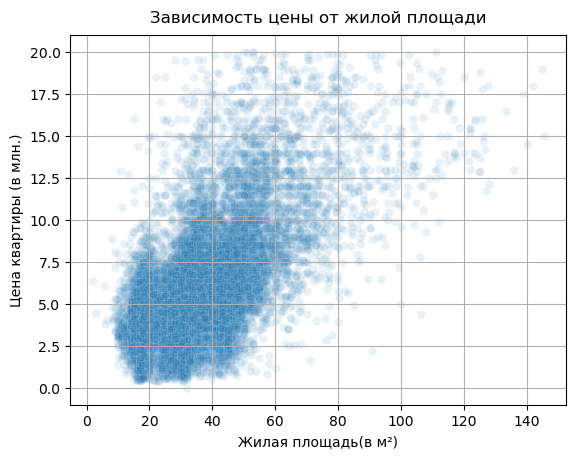

In [55]:
index = ((data['last_price'] < 20000000) & (data['living_area'] < 150))
sns.scatterplot(x=data['living_area'][index], y=data['last_price_new'][index], alpha=0.1);
plt.title('Зависимость цены от жилой площади', loc='center', pad = 10)
plt.xlabel('Жилая площадь(в м²)')
plt.ylabel('Цена квартиры (в млн.)')
plt.grid(True)

<div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Промежуточный вывод:</b></font>

    
<font color="292929" face="Arial"><b>4. Влияние на стоимость недвижимости жилой площади.</b></font>

Цена продажи недвижимости находится в прямой зависимости от жилой ее площади. Особенно сильно эта зависимость прослеживается у недвижимости с жилой площадью до 60 м².
   
</div>

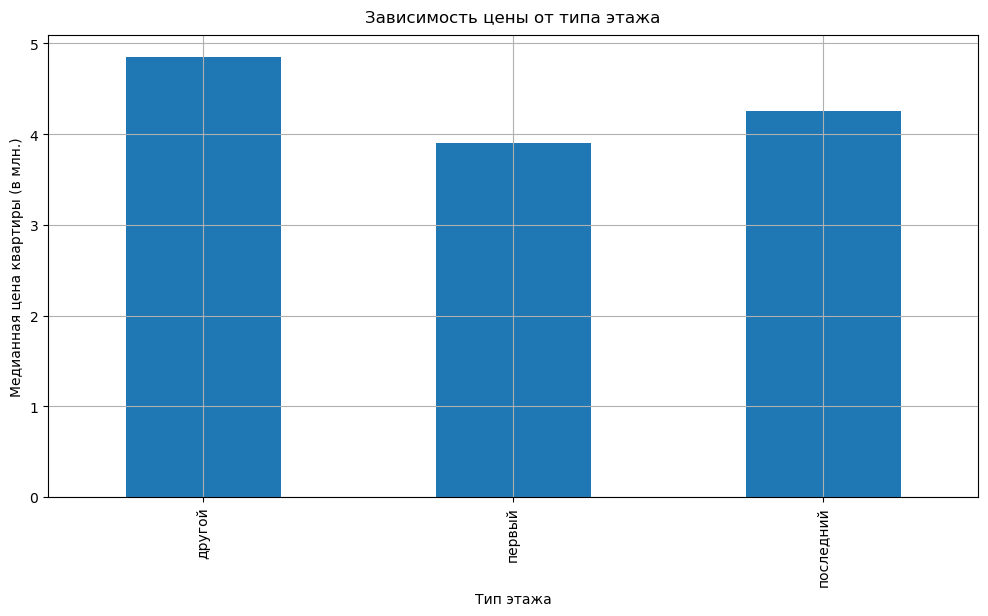

In [56]:
floor_to_price = data.pivot_table(index='type_floor', values='last_price_new', aggfunc='median')
#floor_to_price
floor_to_price['last_price_new'].plot(kind='bar', figsize=(12, 6)) 
plt.title('Зависимость цены от типа этажа', loc='center', pad = 10);
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена квартиры (в млн.)')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Промежуточный вывод:</b></font>

<font color="292929" face="Arial"><b>5. Влияние на стоимость недвижимости типа этажа.</b></font>
    
Квартиры, расположенные на средних этажах, обычно стоят дороже
</div>

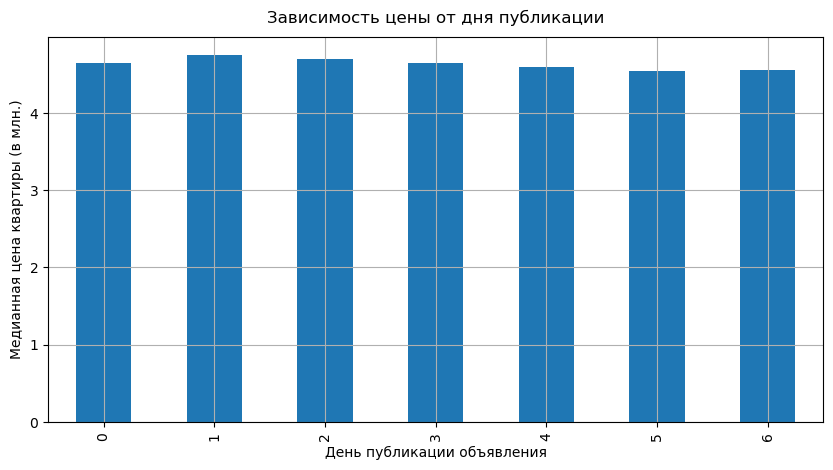

In [57]:
day_to_price = data.pivot_table(index='week_day', values='last_price_new', aggfunc='median')
#day_to_price
day_to_price['last_price_new'].plot(kind='bar', figsize=(10, 5));
plt.title('Зависимость цены от дня публикации', loc='center', pad = 10);
plt.xlabel('День публикации объявления')
plt.ylabel('Медианная цена квартиры (в млн.)')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Промежуточный вывод:</b></font>

<font color="292929" face="Arial"><b>6. Влияние на стоимость недвижимости дня недели, в котором опубликовано объявление.</b></font>
    
Дороже продавалась недвижимость, опубликованная в будни.
</div>

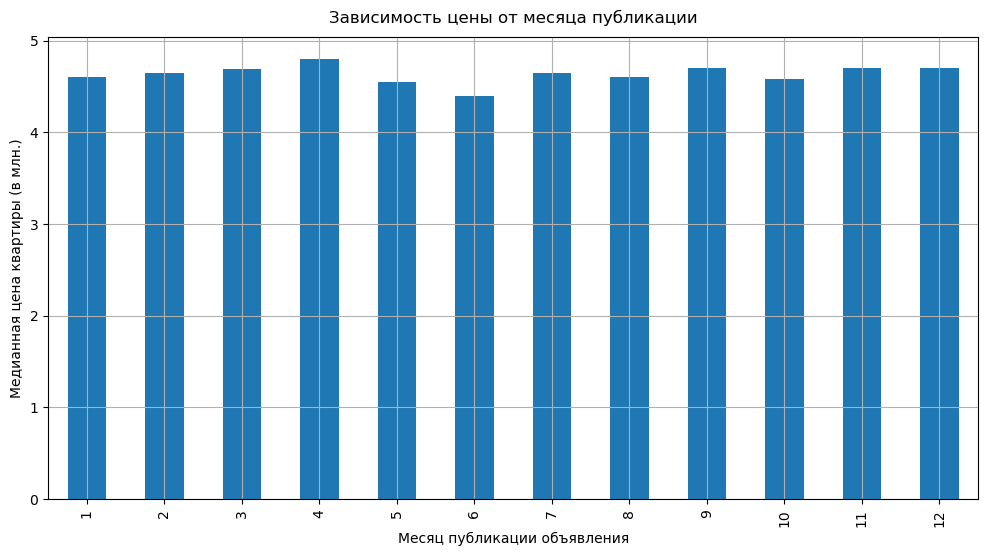

In [58]:
month_to_price = data.pivot_table(index='month', values='last_price_new', aggfunc='median')

month_to_price['last_price_new'].plot(kind='bar', figsize=(12, 6));
plt.title('Зависимость цены от месяца публикации', loc='center', pad = 10);
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Медианная цена квартиры (в млн.)')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Промежуточный вывод:</b></font>

<font color="292929" face="Arial"><b>7. Влияние на стоимость недвижимости месяца, в котором опубликовано объявление.</b></font>
    
Дороже продавалась недвижимость, опубликованная с марта по май и с сентября по декабрь.
</div>

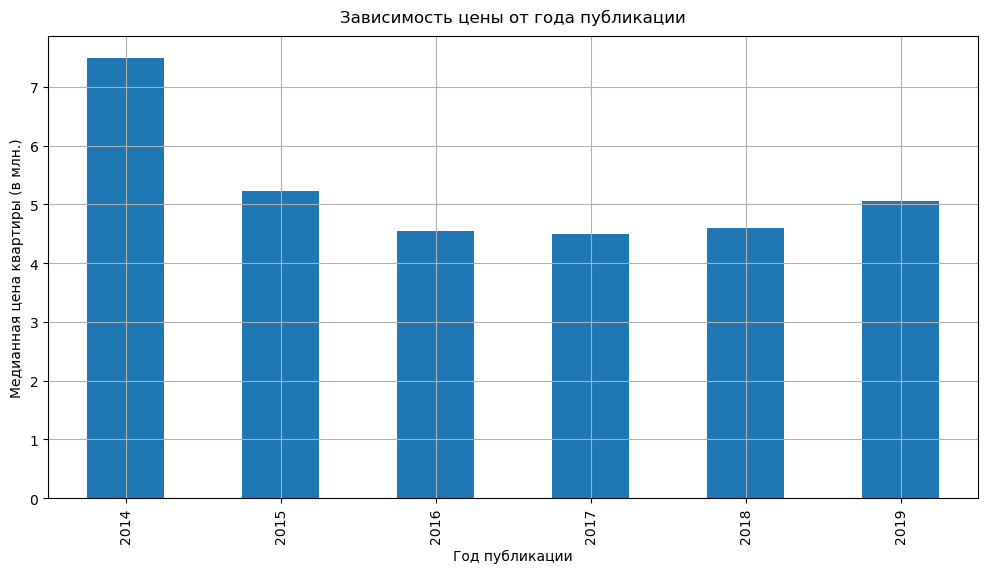

In [59]:
year_to_price = data.pivot_table(index='year', values='last_price_new', aggfunc='median')

year_to_price['last_price_new'].plot(kind='bar', figsize=(12, 6));
plt.title('Зависимость цены от года публикации', loc='center', pad = 10);
plt.xlabel('Год публикации')
plt.ylabel('Медианная цена квартиры (в млн.)')
plt.grid(True)

 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Промежуточный вывод:</b></font>

<font color="292929" face="Arial"><b>8. Влияние на стоимость недвижимости года, в котором опубликовано объявление.</b></font>
    
Дороже продавалась недвижимость, опубликованная в 2014 году.
</div>

In [60]:
# Используя сводную таблицу, найдем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
price_per_meter_top = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
price_per_meter_top.columns = ['count', 'price_per_meter']
price_per_meter_top.sort_values('count', ascending=False).head(10)

,count,price_per_meter
locality_name,,
Санкт-Петербург,15154,111436.281312
Мурино,523,84852.097514
Шушары,430,78023.858140
Кудрово,427,94825.447307
Всеволожск,389,68778.267352
Пушкин,360,102872.944444
Колпино,335,75261.883582
Парголово,321,90418.242991
Гатчина,307,68745.693811


 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px face="Arial"><b>Наблюдение:</b></font>

Наибольшая средняя цена одного квадратного метра среди 10 населённых пунктов с наибольшим числом объявлений в Санкт-Петербурге - 111436 рублей, найменьшая в Выборге - 58011 рублей.
</div>

In [61]:
# Используя сводную таблицу, найдем среднюю цену одного квадратного метра в зависимости от удаленности от центра города Санкт-Петербург. 
area_spb = data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='distance', values='price_per_meter')
area_spb

,price_per_meter
distance,
0.0,157801.263158
1.0,144316.662722
2.0,137156.756458
3.0,117297.266467
4.0,127435.799694
5.0,134430.259172
6.0,136849.412523
7.0,138331.782152
8.0,123488.104348


 <div class="alert alert-info", style="padding: 10px; border: 1px solid SteelBlue; border-radius: 3px;"><p><font size=3px  face="Arial"><b>Наблюдение:</b></font>

Наибольшую стоимость одного квадратного метра имеет недвижимость, расположенная на удалении, не превышающем 1 км от центра города Санкт-Петербург (157801 руб./ м²). С последующим удалением от центра города стоимость одного квадратного метра снижается. Резкое увеличение стоимости квадратного метра на удалении 27 км от центра города связано по всей видимости с расположением недвижимости в элитном районе.
</div>

<div class="alert alert-info"><h3>Общий вывод по исследованию:</h3>

    
Мною проведено исследование, в ходе которого оценены факторы, влияющие на стоимость недвижимости.

<b>В процессе исследования были сформулированы следующие гипотезы:</b>
    
* стоимость недвижимости зависит от общей площади;
* стоимость недвижимости зависит от жилой площади;
* стоимость недвижимости зависит от площади кухни;
* стоимость недвижимости зависит от количества комнат;
* стоимость недвижимости зависит от типа этажа, на котором расположена квартира (первый, последний, другой);
* стоимость недвижимости зависит от даты размещения (день недели, месяц, год).

<font color="292929" face="Arial"><b>Гипотеза 1: Cтоимость недвижимости зависит от общей площади.</b></font>

Гипотеза подтверждена.

Цена продажи недвижимости находится в прямой зависимости от общей площади. Особенно сильно эта зависимость прослеживается у недвижимости с общей площадью до 100 м². На стоимость квартир с большей площадью дополнительное влияние оказывают другие факторы. 
    
<font color="292929" face="Arial"><b>Гипотеза 2: Стоимость недвижимости зависит от жилой площади.</b></font>

Гипотеза подтверждена.
    
Как правило размер жилой площади привязан к общей площади квартиры. Учитывая выявленную зависимость стоимости недвижимости от общей площади, неудивительно, что цена продажи недвижимости находится в прямой зависимости от жилой ее площади. Особенно сильно эта зависимость прослеживается у недвижимости с жилой площадью до 60 м².

<font color="292929" face="Arial"><b>Гипотеза 3: Cтоимость недвижимости зависит от площади кухни.</b></font>

Гипотеза подтверждена частично.

Учитывая, что студии и крартиры со свободной планировкой вообще не имеют кухни, то зависимость не такая сильная, как, например, между ценой продажи недвижимости и ее жилой площадью. Тем не менее, прослеживается определенная корреляция между этими показателями у квартир с площадью кухни до 15 м².
    
<font color="292929" face="Arial"><b>Гипотеза 4: Стоимость недвижимости зависит от количества комнат.</b></font>
    
Гипотеза подтверждена частично.
    
Как правило размер жилой площади квартиры определяет количество комнат. Прослеживается определенная прямая зависимость между стоимостью недвижимости и количеством комнат у квартир с количеством комнат до 4.
    
<font color="292929" face="Arial"><b>Гипотеза 5: Стоимость недвижимости зависит от типа этажа, на котором расположена квартира (первый, последний, другой).</b></font>
    
Гипотеза подтверждена частично.

По итогам исследования установлено, что квартиры, расположенные на средних этажах, обычно стоят дороже.
    
<font color="292929" face="Arial"><b>Гипотеза 6: Стоимость недвижимости зависит от даты размещения (день недели, месяц, год).</b></font>
    
Явной зависимости не выявлено.

Вместе с тем, исходя из медианной стоимости, выявлен ряд особенностей:    
* обычно дороже продавалась недвижимость, опубликованная в будни.
* обычно дороже продавалась недвижимость, опубликованная с марта по май и с сентября по декабрь.
* обычно дороже продавалась недвижимость, опубликованная в 2014 году.
    
    
Также изучена зависимость средней стоимости одного квадратного метра от удаленности от центра города в Санкт-Петербурге и сформулирована следующая гипотеза: 
    
<font color="292929" face="Arial"><b> Гипотеза 7: Средняя цена одного квадратного метра зависит от удаленности от центра города Санкт-Петербург.</b></font>
    
Гипотеза ожидаемо подтверждена.
    
Чем ближе квартира в Санкт-Петербурге находится к центру города, тем выше стоимость квадратного метра. Наибольшую стоимость одного квадратного метра имеет недвижимость, расположенная на удалении, не превышающем 1 км от центра города Санкт-Петербург (157801 руб./ м²). Дешевле всего стоит квадратный метр недвижимости, расположенной на удалении 29 км от центра города (72952 руб./ м²). Резкое увеличение стоимости квадратного метра на удалении 27 км от центра города (132115 руб./ м²) связано по всей видимости с расположением недвижимости в элитном районе.   
</div>